# REGRESSION MODEL - ENSEMBLE METHODS
========================================================================


# 1.Importing dataset and necessary libraris

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('day.csv')

In [3]:
df1.round(4)
df=df1.copy()

In [4]:
df.drop(['instant','casual','registered','atemp','dteday'],axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
# Apply scaler() to all the columns(only for continuous variables) except the 'yes-no' and 'dummy' variables
num_vars =['cnt']
df[num_vars] = norm.fit_transform(df[num_vars])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,0.110792
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,0.089623
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,0.152669
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,0.177174
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,0.181546


In [6]:
df_inverzija=df.copy()
df_inverzija['cnt_inv']=norm.inverse_transform(df[num_vars])


In [7]:
def drop_categorical_feature(data,features_list):
    df_modeling=data.drop(features_list, axis=1)
    return df_modeling
#since in dataset i have numerical values i will drop tham, and also values categorical with binar value(yr,holiday,workingday)
numerical=['temp','hum','windspeed','cnt','yr','holiday','workingday']

In [8]:
drop_categorical_feature(df,numerical)

,season,mnth,weekday,weathersit
0,1,1,6,2
1,1,1,0,2
2,1,1,1,1
3,1,1,2,1
4,1,1,3,1
...,...,...,...,...
726,1,12,4,2
727,1,12,5,2
728,1,12,6,2
729,1,12,0,1


In [9]:
def one_hot_encoder(list_feature_name,df):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    ohe.fit(df)
    df_enc = pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.get_feature_names())
    return df_enc

In [10]:
list_name=['season','mnth','weekday','weathersit']
df1_enc=one_hot_encoder(list_name,drop_categorical_feature(df,numerical))

In [13]:
df_hot=df1_enc.rename(columns={'x0_1':'spring','x0_2':'summer','x0_3':'fall','x0_4':'winter','x1_2':'Jan','x1_2':'Feb','x1_3':'Mar','x1_4':'Apr','x1_5':'May','x1_6':'Jun','x1_7':"Jul",'x1_8':'Avg','x1_9':'Sep','x1_10':'Oct','x1_11':'Nov','x1_12':'Dec',
'x3_1':'Mist', 'x3_2':'Light Snow', 'x3_3':'Heavy Rain','x2_0':'Sunday','x2_1':'Monday', 'x2_2':'Tuseday', 'x2_3':'Wednesday', 'x2_4':'Tursday', 'x2_5':'Fryday', 'x2_6':'Saturday'})

In [14]:
# Concatenation of data_set with new df_frames after one_hote_encoder
# if we have more feature to encode in list functon put all new datasets devided by coma
df_transform = pd.concat([df,df_hot], axis=1)
df_transform.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sunday,Monday,Tuseday,Wednesday,Tursday,Fryday,Saturday,Mist,Light Snow,Heavy Rain
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
def drop_categorical_feature(data,features_list):
    df_modeling=data.drop(features_list, axis=1)
    return df_modeling

In [16]:
df_modeling=drop_categorical_feature(df_transform,['season','mnth','weekday','weathersit'])

In [17]:
#Split dataset on train and test

def split_data_set(data,dependant_feature,test_size):
    from sklearn.model_selection import train_test_split
    y=data[dependant_feature]
    X=data.drop([dependant_feature],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=0)
    return X_train,X_test,y_train,y_test

In [18]:
X_train,X_test,y_train,y_test=split_data_set(df_modeling,"cnt",0.15)

In [19]:
print("X_train shape:{}\n y_train shape:{}\n X_test shape:{}\n y_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train shape:(621, 32)
 y_train shape:(621,)
 X_test shape:(110, 32)
 y_test shape:(110,)


# Ensemble method_ Stacking method

Stacked generalization is a method for combining estimators to reduce their biases.
More precisely, the predictions of each individual estimator are stacked together 
and used as input to a final estimator to compute the prediction. 
This final estimator is trained through cross-validation.
The StackingClassifier and StackingRegressor provide such strategies 
which can be applied to classification and regression problems.
The estimators parameter corresponds to the list of the estimators which are 
stacked together in parallel on the input data. It should be given as a list of names and estimators:

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
estimators = [('ridge', RidgeCV()),
('lasso', LassoCV(random_state=42)),
('svr', SVR(C=1, gamma=1e-6))]

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
reg = StackingRegressor(
estimators=estimators,
final_estimator=GradientBoostingRegressor(random_state=42))

In [31]:
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('lasso', LassoCV(random_state=42)),
                              ('svr', SVR(C=1, gamma=1e-06))],
                  final_estimator=GradientBoostingRegressor(random_state=42))

In [32]:
y_pred = reg.predict(X_test)
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.87


In [33]:
final_layer = StackingRegressor(
estimators=[('rf', RandomForestRegressor(random_state=42)),
('gbrt', GradientBoostingRegressor(random_state=42))],
final_estimator=RidgeCV())
multi_layer_regressor = StackingRegressor(
estimators=[('ridge', RidgeCV()),
('lasso', LassoCV(random_state=42)),
('svr', SVR(C=1, gamma=1e-6, kernel='rbf'))],
final_estimator=final_layer)

multi_layer_regressor.fit(X_train, y_train)
StackingRegressor(...)
print('R2 score: {:.2f}'.format(multi_layer_regressor.score(X_test, y_test)))

R2 score: 0.86


# Ensemble method _Voting Regressor

In [34]:

reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

ypred=ereg.predict(X_test)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)


for reg, label in zip([reg1, reg2, reg3, ereg], ['GradientBoostingRegressor', 'RandomForestRegressor', 'LinearRegression', 'Ensemble']):
    y_pred=reg.predict(X_test)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE=mean_squared_error(y_test,y_pred)
    print("MAE       {: .4f} for model {} ".format(MAE, label))
    print("MSE       {: .4f} for model {} ".format(MSE,label))
    print('R2 score:  {:.2f}'.format(r2_score(y_test, y_pred)))
    print()

MAE        0.0588 for model GradientBoostingRegressor 
MSE        0.0067 for model GradientBoostingRegressor 
R2 score:  0.89

MAE        0.0588 for model RandomForestRegressor 
MSE        0.0066 for model RandomForestRegressor 
R2 score:  0.89

MAE        0.0682 for model LinearRegression 
MSE        0.0087 for model LinearRegression 
R2 score:  0.86

MAE        0.0565 for model Ensemble 
MSE        0.0061 for model Ensemble 
R2 score:  0.90



# Let's visualize resluts

In [35]:
xt = X_test[:20]

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

<Figure size 432x288 with 0 Axes>

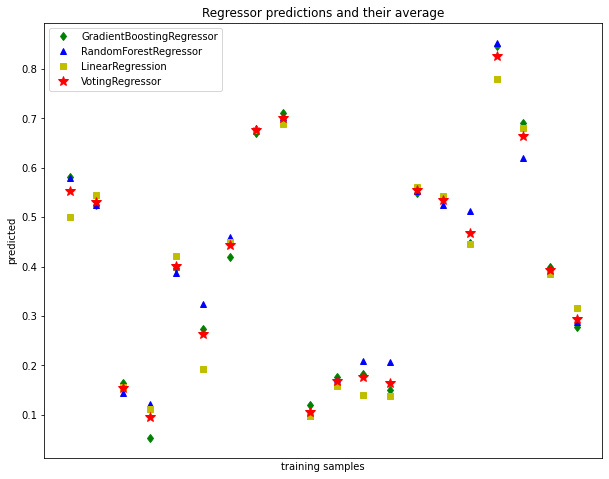

In [36]:
plt.figure()
plt.figure(figsize=(10,8))
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.show()

# Conclusion: Ensemble method _Voting Regressor gives the best results